In [7]:
import numpy as np
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import scipy as sp
import scipy.stats
import random

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [8]:
# Generate data points with noise
num_points = 150
Tx = np.linspace(5., 8., num_points)
Ty = Tx

tX = 11.86*np.cos(2*pi/0.81*Tx-1.32) + 0.64*Tx+4*((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))
tY = -32.14*np.cos(2*np.pi/0.8*Ty-1.94) + 0.15*Ty+7*((0.5-np.random.rand(num_points))*np.exp(2*np.random.rand(num_points)**2))

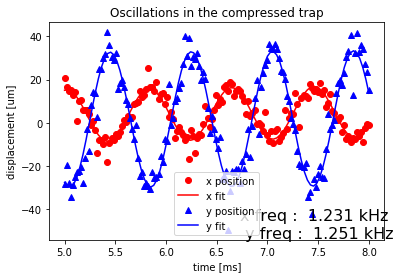

In [9]:
# Fit the first set
fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [-15., 0.8, 0., -1.] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx, tX))

time = np.linspace(Tx.min(), Tx.max(), 100)
plt.plot(Tx, tX, "ro", time, fitfunc(p1, time), "r-") # Plot of the data and the fit

# Fit the second set
p0 = [-15., 0.8, 0., -1.]
p2,success = optimize.leastsq(errfunc, p0[:], args=(Ty, tY))

time = np.linspace(Ty.min(), Ty.max(), 100)
plt.plot(Ty, tY, "b^", time, fitfunc(p2, time), "b-")

# Legend the plot
plt.title("Oscillations in the compressed trap")
plt.xlabel("time [ms]")
plt.ylabel("displacement [um]")
plt.legend(('x position', 'x fit', 'y position', 'y fit'))

ax = plt.axes()

plt.text(0.8, 0.07,
         'x freq :  %.3f kHz \n y freq :  %.3f kHz' % (1/p1[1],1/p2[1]),
         fontsize=16,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes)

plt.show()

In [103]:
# Generate data points with noise
# tizen = pd.read_csv("bugs-1-tizen.csv", delimiter=';')
# tizen = pd.read_csv("bugs-2-cyanogen.csv", delimiter=';')
tizen = pd.read_csv("SS1.DAT", sep = '\t', names=['x', 'z', 'y'])
# tizen = pd.read_csv("bugs-3-nemo.csv", delimiter=';')
# tizen = pd.read_csv("bugs-4-mer.csv", delimiter=';') # 97
# tizen = pd.read_csv("bugs-5-tatar.csv", delimiter=',')
# tizen = pd.read_csv("bugs-6-sedmsk.csv", delimiter=',')
# tizen = pd.read_csv("bugs-7-minfin.csv", delimiter=',') # 71, 41 (GO)
# tizen = pd.read_csv("bugs-8-pmo.csv", delimiter=',')
num_points = 150
Tx = tizen.x.values

tX = tizen.y.values
# tX = tX/np.max(tX)

In [104]:
# Fit the first set
# fitfunc = lambda p, x: p[0]* (1- np.exp(-p[1]*x)) # G-O concave
# fitfunc = lambda p, x: p[0]*(1 - (1 + p[1]*x) * np.exp(-p[1]*x)) # G-O s shaped
# fitfunc = lambda p, x: p[0] * (1 - (1 + p[1] * (x**p[2])) * np.exp(-p[1]*(x**p[2]))) # Weibull
fitfunc = lambda p, x: p[0]/(1+p[1]*np.exp(-p[2]*x)) # logistic
errfunc = lambda p, x, y: (fitfunc(p, x) - y)**2 # Distance to the target function

12.3208503494


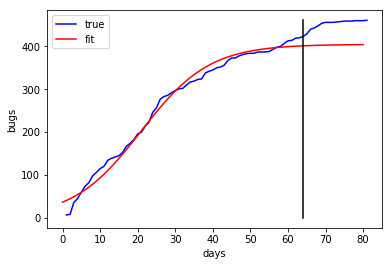

In [105]:

p0 = [3000, random.uniform(0,0.1), random.uniform(0,0.1)] # Initial guess for the parameters
# p0 = [1, random.uniform(0,0.100), random.uniform(0, 0.01)]
points_to_learn = len(Tx) * 8/10
p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx[:points_to_learn], tX[:points_to_learn]))
# p1 = [1.0, 0.002]
# noized_tizen = noize_bags(tizen,std = 1000)
# p1, success = optimize.leastsq(errfunc, p0[:], args=(noized_tizen.x.values, noized_tizen.y.values))
# time = np.linspace(Tx.min(), Tx.max(), 100)
time = np.array([x for x in range(len(Tx))])
plt.plot(Tx, tX, "b-", time, fitfunc(p1, time), "r-") # Plot of the data and the fit
plt.plot([points_to_learn, points_to_learn], [0, max(tX)], 'k-')
# plt.plot(noized_tizen.x.values, noized_tizen.y.values, "r--", time, fitfunc(p1, time), "r-") # Plot of the data and the fit

# Legend the plot
# plt.title("Tizen")
plt.xlabel("days")
plt.ylabel("bugs")
plt.legend(('true', 'fit'), loc='upper left')
print(np.abs(tX[-1]-fitfunc(p1, time)[-1])*100/tX[-1])


ax = plt.axes()
# plt.text(0.8, 0.07,
#          'x freq :  %.3f kHz \n y freq :  %.3f kHz' % (1/p1[1],1/p2[1]),
#          fontsize=16,
#          horizontalalignment='center',
#          verticalalignment='center',
#          transform=ax.transAxes)

plt.show()

In [267]:
for i in range(10, 100, 10):
    # fitfunc = lambda p, x: p[0]/(1+p[1]*np.exp(-p[2]*x)) # logistic
#     fitfunc = lambda p, x: p[0]* (1- np.exp(-p[1]*x)) # G-O concave
#     fitfunc = lambda p, x: p[0]*(1 - (1 + p[1]*x) * np.exp(-p[1]*x)) # G-O s shaped
    fitfunc = lambda p, x: p[0] * (1 - (1 + p[1] * (x**p[2])) * np.exp(-p[1]*(x**p[2]))) # Weibull
#     tizen = pd.read_csv("bugs-1-tizen.csv", delimiter=';')
#     tizen = pd.read_csv("bugs-2-cyanogen.csv", delimiter=';')
    tizen = pd.read_csv("SS1.DAT", sep = '\t', names=['x', 'z', 'y'])
    x = tizen.y.values

    t = tizen.x.values
    x = tizen.y.values

    t = preprocessing.minmax_scale(t, (0.1, 0.9))
    x = preprocessing.minmax_scale(x, (0.1, 0.9))
    X = t#[np.arange(0, len(t), 10)]
    Y = x#[np.arange(0, len(t), 10)]

    points_to_learn = i*len(X)/100
    X_train, X_test = X[:points_to_learn], X[points_to_learn:]
    y_train, y_test = Y[:points_to_learn], Y[points_to_learn:]

    def err(p):
        return mean_squared_error(fitfunc(p, X_train), y_train)

    p0 = [0.6, random.uniform(0,1), random.uniform(0,0.1)] # Initial guess for the parameters
    res = optimize.minimize(err, p0[:], method='L-BFGS-B', \
                            options={'xtol': 1e-4, 'disp': True, 'maxiter': 2000})
    y_pred = fitfunc(res.x, X)
    print(i, mean_absolute_error(y_train, y_pred[:points_to_learn]), \
            mean_absolute_error(y_test, y_pred[points_to_learn:]), \
            AcFP(y_test[-1], y_pred[-1]))

/home/kamilsa/miniconda3/envs/venv2/lib/python2.7/site-packages/ipykernel/__main__.py:27: OptimizeWarning: Unknown solver options: xtol


(10, 0.0067863166513447704, 0.73242249698462836, 160.24339333949402)
(20, 0.013695676948860992, 0.1374072218787068, 37.230676269449809)
(30, 0.012303660988556083, 0.12394856297313492, 32.143744581956803)
(40, 0.014527884732286094, 0.17495916036836973, 36.845558001912508)
(50, 0.014415598566049201, 0.024067787526566398, 3.0295626305602874)
(60, 0.01268925681543664, 0.017870882806570527, 1.1629334646586653)
(70, 0.012456103674332003, 0.035878399990900187, 5.3184205141753402)
(80, 0.011852216033224727, 0.042799809830633882, 4.5474387594062318)
(90, 0.014135328928562193, 0.013987261413251474, 0.86184751246080415)


/home/kamilsa/miniconda3/envs/venv2/lib/python2.7/site-packages/ipykernel/__main__.py:5: OptimizeWarning: Unknown solver options: xtol


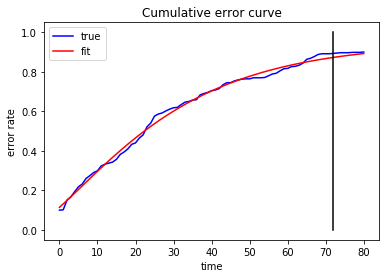

In [268]:
def err(p):
    return mean_squared_error(fitfunc(p, X_train), y_train)

p0 = [1, random.uniform(0,1), random.uniform(0,1)] # Initial guess for the parameters
res = optimize.minimize(err, p0[:], method='L-BFGS-B', \
                        options={'xtol': 1e-4, 'disp': True, 'maxiter': 2000})
y_pred = fitfunc(res.x, X)
plt.plot(Y, "b-", y_pred, "r-") # Plot of the data and the fit
plt.title("Cumulative error curve")
plt.xlabel("time")
plt.ylabel("error rate")
plt.plot([points_to_learn, points_to_learn], [0, 1], 'k-')
plt.legend(('true', 'fit'), loc=2)
plt.show()

In [234]:
mean_absolute_error(y_train, y_pred[:points_to_learn]), \
        mean_absolute_error(y_test, y_pred[points_to_learn:]), \
        AcFP(y_test[-1], y_pred[-1])

(0.032295994688437663, 0.18589873291001874, 15.106703805860642)

#### def AcFP(real, predicted):
    return (np.abs(real - predicted) / real * 100)

In [43]:
AcFP(tX[-1], fitfunc(p1,time)[-1]), GoF(tX, fitfunc(p1, time), len(p1))

NameError: name 'AcFP' is not defined

In [44]:
def noize_bags(df, mean=0, std=1):
    vals = df['y'].values
    num_errors = np.zeros(len(vals),dtype=int)
    for i in range(len(vals))[:0:-1]:
        num_errors[i] = vals[i] - vals[i-1]
    arr = list(map(lambda x: np.ones(x), num_errors))
    noized = [[] for x in range(len(arr))]
    for i in range(len(arr)):
        for j in arr[i]:
            dif = int(np.random.normal(mean, std,1)[0])
            if (i+dif >0 and i+dif < len(noized)-1):
                noized[i+dif].append(1)
    noized_days = np.array(list(map(lambda x: len(x), noized)))
    cdf = np.zeros(len(noized_days), dtype=int)
    for i in range(len(cdf)):
        if i == 0:
            cdf[i] = noized_days[i]
        else:
            cdf[i] = cdf[i-1] + noized_days[i]
    res = pd.DataFrame(columns=['x','y'])
    res.x = df.x
    res.y = cdf
    return res

def GoF(y_predicted, y, param_number):
    """
    Goodness of Fit shows how well the model fits the original data. 
    GoF is calculated as a sum of squared residuals divided by the number of degrees of freedom
    
    :param y_predicted: NumPy array of predicted values
    :param y: NumPy array of actual values
    :param param_number: number of model parametres. Used to estimate degrees of freedom.
    :return: float number
    """
    return np.sum(np.power(y_predicted - y, 2)) / (len(y) - param_number)

def PA(trainset, fit_func, x_label='x', y_label='y', p0 = [2000, 0.1], last_point = 0):
    """
    Predictive Ability shows how early in the testing 
    the model is able to predict the final number 
    of defects with maximum 10% error. Measured in percentages.
    
    :param trainset: pandas dataframe with data to evaluate
    :param x_label: corresponds to the name of column of days
    :param y_label: cumalative number of faults per day
    :param p0: initial parameters to start fitting
    :return: float number
    """
    X = trainset.x.values
    trainset.y = trainset.y/np.max(trainset.y.values)
    y = trainset.y.values

#     y = y/np.max(y)
#     print(y)
    last = len(trainset) # index of last point - 1
    for i in range(1, last-1):
        tr = trainset.head(last - i)
        errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
        p1, success = optimize.leastsq(errfunc, p0[:], args=(tr.x.values, tr.y.values))
        predicted = fitfunc(p1, X[-1])
        error = AcFP(y[-1], predicted)
#         print(i, y[-1], predicted, error)
        if error > 10:
            pa = round(float(i)/last, 6)
            break
    return pa*100
        
def AcFP(real, predicted):
    """
    The accuracy of final point (AcFP) corresponds to the effectiveness of the model 
    in determining the final number of defects observed in the dataset.
    """
#     print(real, predicted)
    return np.abs(real - predicted) / real * 100

In [45]:
#PA(tizen, fitfunc, p0 = p0),
from sklearn.metrics import mean_squared_error
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h
res = []
# fitfunc = lambda p, x: p[0]* (1- np.exp(-p[1]*x)) # G-O concave
# fitfunc = lambda p, x: p[0]*(1 - (1 + p[1]*x) * np.exp(-p[1]*x)) # G-O s shaped
# fitfunc = lambda p, x: p[0] * (1 - (1 + p[1] * (x**p[2])) * np.exp(-p[1]*(x**p[2]))) # Weibull
fitfunc = lambda p, x: p[0]/(1+p[1]*np.exp(-p[2]*x)) # logistic
for i in range(400):
#     p0 = [random.uniform(0,2), random.uniform(0,1), random.uniform(0,1)]
#     p0 = [1, random.uniform(0,100), random.uniform(0, 0.001)]
#     p0 = [1, -random.uniform(0,0.01), random.uniform(0,0.01)]
    p0 = [1, random.uniform(0,0.100), random.uniform(0, 0.01)]
    points_to_learn = len(Tx) * 3/4
    p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx[:points_to_learn], tX[:points_to_learn]))
    res.append(AcFP(fitfunc(p1,time)[-1], tX[-1]))

In [46]:
100-PA(tizen, fitfunc, p0 = p0)

59.9849

In [47]:
print("%.4e, %.4e, %.4e" % mean_confidence_interval(res))

1.4458e+02, 1.4389e+02, 1.4528e+02


In [34]:
import random

In [35]:
def experiment(tizen, var, fitfunc):
    gof_err = 0
    pa_err = 0
    acfp_err = 0
    if var != 0:
        noized_tizen = noize_bags(tizen,std = np.sqrt(var))
    else:
        noized_tizen = tizen
    p0 = [random.uniform(0,2*max(tizen.y.values)), random.uniform(0,0.01)]
    p1, success = optimize.leastsq(errfunc, p0[:], args=(noized_tizen.x.values, noized_tizen.y.values))
    y_pred = fitfunc(p1, noized_tizen.x)
    mse = GoF(tizen.y.values, y_pred,len(p0))
    pa = PA(noized_tizen, fitfunc, p0=p0, last_point = tizen.y.values[-1])
    acfp = AcFP(tizen.y.values[-1], y_pred.values[-1])
    if float(abs(mse - mse_baseline))/mse_baseline > 0.05:
        gof_err += 1
    if float(abs(pa - pa_baseline))/pa_baseline > 0.05:
        pa_err += 1
    if float(abs(acfp - acfp_baseline))/acfp_baseline > 0.05:
        acfp_err += 1
    return mse, pa, acfp, gof_err, pa_err, acfp_err, p1

In [36]:
tizen.y.values[-1]

5590

In [50]:
%%time
## Goel_Okumoto_S_Shaped test

fitfunc = lambda p, x: p[0]*(1 - (1 + p[1]*x) * np.exp(-p[1]*x))
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [random.uniform(0,2*max(tizen.y.values)), random.uniform(0,0.01)] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx, tX))
y_pred = fitfunc(p1, tizen.x)
print(y_pred.values[-1])
mse_baseline = GoF(y_pred, tizen.y.values,len(p0))
pa_baseline = PA(tizen, fitfunc, p0, last_point=tizen.y.values[-1])
acfp_baseline = AcFP(tizen.y.values[-1], y_pred.values[-1])
print(mse_baseline, pa_baseline, acfp_baseline)

mmses = []
mpases = []
macfpes = []
gof_errors = []
pa_errors = []
acfp_errors = []

var = 1
step = 10
while True:
    var += step
    print("var = ", var)
    exps = 1000 # number of experiments (should be 1000)
    mses = []
    pas = []
    acfps = []
    gof_err = 0
    pa_err = 0
    acfp_err = 0
    for i in range(exps):
        mse, pa, acfp, fgof_err, fpa_err, facfp_err, p1 = experiment(tizen, var, fitfunc)
        mses.append(mse)
        pas.append(pa)
        acfps.append(acfp)
        gof_err += fgof_err
        pa_err += fpa_err
        acfp_err += facfp_err
    mmse = np.mean(np.array(mses))
    mpas = np.mean(np.array(pas))
    macfp = np.mean(np.array(acfps))
    
    mmses.append(mmse)
    mpases.append(mpas)
    macfpes.append(macfp)
    gof_errors.append(gof_err)
    pa_errors.append(pa_err)
    acfp_errors.append(acfp_err)
    
    print("%f of gof errors" % (float(gof_err)*100/exps))
    print("%f of pa errors" % (float(pa_err)*100/exps))
    print("%f of acfp errors" % (float(acfp_err)*100/exps))
    if float(gof_err)/exps > 0.05 and float(pa_err)/exps > 0.05 and float(acfp_err)/exps > 0.05:
        break
print("Done")

6027.56490658
80615.76712 3.5418 7.82763696924
var =  11


/home/kamil/miniconda3/envs/venv/lib/python3.5/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)
/home/kamil/miniconda3/envs/venv/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/home/kamil/miniconda3/envs/venv/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()


0.700000 of gof errors
1.300000 of pa errors
0.700000 of acfp errors
var =  21
0.900000 of gof errors
2.500000 of pa errors
0.900000 of acfp errors
var =  31
1.400000 of gof errors
3.000000 of pa errors
1.400000 of acfp errors
var =  41
1.700000 of gof errors
3.200000 of pa errors
1.700000 of acfp errors
var =  51
1.500000 of gof errors
3.200000 of pa errors
1.500000 of acfp errors
var =  61
1.200000 of gof errors
2.400000 of pa errors
1.200000 of acfp errors
var =  71
1.200000 of gof errors
2.200000 of pa errors
1.200000 of acfp errors
var =  81
1.000000 of gof errors
3.400000 of pa errors
1.000000 of acfp errors
var =  91
1.300000 of gof errors
2.300000 of pa errors
1.300000 of acfp errors
var =  101
1.200000 of gof errors
2.900000 of pa errors
1.200000 of acfp errors
var =  111
0.800000 of gof errors
2.000000 of pa errors
0.800000 of acfp errors
var =  121
1.400000 of gof errors
2.500000 of pa errors
1.400000 of acfp errors
var =  131
0.900000 of gof errors
2.600000 of pa errors
0.9

KeyboardInterrupt: 

In [58]:
len(np.array(list(range(1, var, step)))), len(mmses)

(179, 178)

In [60]:
df = pd.DataFrame(columns=['var', 'mmse', 'mpa', 'macfp','gof_errs', 'pa_errs', 'acfp_errs'])
df['var'] = np.array(list(range(1, var, step)))[:len(mmses)]
df['mmse'] = np.array(mmses)
df['mpa'] = np.array(mpases)
df['macfp'] = np.array(macfpes)
df.gof_errs = np.array(gof_errors)
df.pa_errs = np.array(pa_errors)
df.acfp_errs = np.array(acfp_errors)
df[:30]

,var,mmse,mpa,macfp,gof_errs,pa_errs,acfp_errs
0,1,85110.382058,3.501941,8.016355,7,13,7
1,11,86395.443735,3.473080,8.068580,9,25,9
2,21,89604.765751,3.459063,8.210656,14,30,14
3,31,91531.753516,3.451378,8.292651,17,32,17
4,41,90248.608801,3.460347,8.231239,15,32,15
5,51,88323.008063,3.478961,8.142184,12,24,12
6,61,88324.018062,3.490794,8.137911,12,22,12
7,71,87040.701956,3.472108,8.077725,10,34,10
8,81,88966.699436,3.492078,8.162043,13,23,13
9,91,88325.482163,3.482132,8.130122,12,29,12


In [61]:
df[:30].to_csv('tizen-processed1.csv',index=False)

In [49]:
def wait_on_b():
    time.sleep(5)
#     print(b.result())  # b will never complete because it is waiting on a.
    return 5

def wait_on_a():
    time.sleep(5)
#     print(a.result())  # a will never complete because it is waiting on b.
    return 6
with ThreadPoolExecutor(max_workers=2) as executor:
    a = executor.submit(wait_on_b)
    b = executor.submit(wait_on_a)
    print(a.result())
    print(b.result())

5
6


In [45]:
a.result

<bound method Future.result of <Future at 0x7f1f2cd18e48 state=running>>

# Second part

In [62]:
%%time
## Goel_Okumoto_S_Shaped test

from concurrent.futures import ThreadPoolExecutor
from multiprocessing.dummy import Pool as ThreadPool

fitfunc = lambda p, x: p[0]*(1 - (1 + p[1]*x) * np.exp(-p[1]*x))
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [2000, 0.1,] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx, tX))

y_pred = fitfunc(p1, tizen.x)
mse_baseline = GoF(y_pred, tizen.y.values,len(p0))
pa_baseline = PA(tizen, fitfunc)
lp_baseline = float(np.abs(tizen.y.values[-1] - fitfunc(p1, tizen.x.values[-1])))*100/tizen.y.values[-1]
print(mse_baseline, pa_baseline)

mmses = []
mpases = []
mlp_difs = []
gof_errors = []
pa_errors = []
lp_errors = []

counter = 0
std = 1
# for std in range(10,101,10):
while True:
    counter += 1
    std += 1
    print("std = ", std)
    exps = 100 # number of experiments (should be 1000)
    mses = []
    pas = []
    lp_difs = []
    gof_err = 0
    pa_err = 0
    lp_err = 0
    for i in range(exps):
#             mse, pa, gof_err, pa_err = experiment(tizen, std, fitfunc)
#             mses.append(mse)
#             pas.append(pa)
        mse, pa, acfp, fgof_err, fpa_err, facfp_err, p1 = experiment(tizen[:len(tizen)-counter], 0, fitfunc)
        mses.append(mse)
        pas.append(pa)
        gof_err += fgof_err
        pa_err += fpa_err
        last_point_dif = float(np.abs(tizen.y.values[-1] - fitfunc(p1, tizen.x.values[-1])))*100/tizen.y.values[-1]
        lp_difs.append(last_point_dif)
        if np.abs(float(lp_baseline - last_point_dif))/lp_baseline > 0.05:
            lp_err += 1
            
    mmse = np.mean(np.array(mses))
    mpas = np.mean(np.array(pas))
    mlp_dif = np.mean(np.array(lp_difs))
    
    mmses.append(mmse)
    mpases.append(mpas)
    gof_errors.append(gof_err)
    pa_errors.append(pa_err)
    mlp_difs.append(mlp_dif)
    
    print("%f of gof errors" % (float(gof_err)*100/exps))
    print("%f of pa errors" % (float(pa_err)*100/exps))
    print("%f of lp errors" % (float(lp_err)*100/exps))
    if float(gof_err)/exps > 0.05 or float(pa_err)/exps > 0.05 or float(lp_err)/exps > 0.05:
          break
print("Done")

/home/kamil/miniconda3/envs/venv/lib/python3.5/site-packages/ipykernel/__main__.py:70: RuntimeWarning: divide by zero encountered in double_scalars


80615.7671272 0.0754
std =  2


/home/kamil/miniconda3/envs/venv/lib/python3.5/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)


2.000000 of gof errors
98.000000 of pa errors
2.000000 of lp errors
Done
CPU times: user 10.2 s, sys: 4 ms, total: 10.2 s
Wall time: 10.2 s


In [63]:
df = pd.DataFrame(columns=['point', 'mmse', 'mpa','gof_errs', 'pa_errs', 'lp_dif'])
df['point'] = np.array(list(range(1, std)))
df['mmse'] = np.array(mmses)
df['mpa'] = np.array(mpases)
df['acfp'] = np.array()
df.gof_errs = np.array(gof_errors)/10
df.pa_errs = np.array(pa_errors)/10
df.lp_dif = np.array(mlp_difs)
df

TypeError: Required argument 'object' (pos 1) not found

In [50]:
df.to_csv('tizen-processed2.csv', index=False)

In [53]:
gof_errors

[1, 7, 11, 9, 9, 8]

In [51]:
mmses

[81170.663188500374,
 84904.708810847529,
 87337.898659478902,
 85960.099630807395,
 85851.543600029603,
 85117.288295551771]

In [65]:
%%time
## Goel_Okumoto_S_Shaped test

fitfunc = lambda p, x: p[0]*(1 - (1 + p[1]*x) * np.exp(-p[1]*x))
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [random.uniform(0,2*max(tizen.y.values)), random.uniform(0,0.01)] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx, tX))
y_pred = fitfunc(p1, tizen.x)
print(y_pred.values[-1])
mse_baseline = GoF(y_pred, tizen.y.values,len(p0))
pa_baseline = PA(tizen, fitfunc, p0, last_point=tizen.y.values[-1])
acfp_baseline = AcFP(tizen.y.values[-1], y_pred.values[-1])
print(mse_baseline, pa_baseline, acfp_baseline)

mmses = []
mpases = []
macfpes = []
gof_errors = []
pa_errors = []
acfp_errors = []

counter = 0
std = 1
step = 10
while True:
    counter += 1
    std += step
    print("std = ", std)
    exps = 100 # number of experiments (should be 1000)
    mses = []
    pas = []
    acfps = []
    gof_err = 0
    pa_err = 0
    acfp_err = 0
    for i in range(exps):
#         future = executor.submit(experiment, tizen, std, fitfunc)
#         futures.append(future)
#             mse, pa, gof_err, pa_err = experiment(tizen, std, fitfunc)
#             mses.append(mse)
#             pas.append(pa)
        mse, pa, acfp, fgof_err, fpa_err, facfp_err, p1 = experiment(tizen[:len(tizen)-counter], 0, fitfunc)
        y_last_predicted = fitfunc(p1, tizen.x.values[-1])
        y_last = tizen.y.values[-1]
        acfp = AcFP(y_last, y_last_predicted)
        mses.append(mse)
        pas.append(pa)
        acfps.append(acfp)
        gof_err += fgof_err
        pa_err += fpa_err
        acfp_err += facfp_err
    mmse = np.mean(np.array(mses))
    mpas = np.mean(np.array(pas))
    macfp = np.mean(np.array(acfps))
    
    mmses.append(mmse)
    mpases.append(mpas)
    macfpes.append(macfp)
    gof_errors.append(gof_err)
    pa_errors.append(pa_err)
    acfp_errors.append(acfp_err)
    
    print("%f of gof errors" % (float(gof_err)*100/exps))
    print("%f of pa errors" % (float(pa_err)*100/exps))
    print("%f of acfp errors" % (float(acfp_err)*100/exps))
    if float(gof_err)/exps > 0.05 or float(pa_err)/exps > 0.05 or float(acfp_err)/exps > 0.05:
        break
print("Done")

6027.56737269
80615.7671247 3.5418 7.82768108562
std =  11


/home/kamil/miniconda3/envs/venv/lib/python3.5/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)


0.000000 of gof errors
1.000000 of pa errors
0.000000 of acfp errors
std =  21
1.000000 of gof errors
2.000000 of pa errors
1.000000 of acfp errors
std =  31
0.000000 of gof errors
1.000000 of pa errors
0.000000 of acfp errors
std =  41
2.000000 of gof errors
3.000000 of pa errors
2.000000 of acfp errors
std =  51
1.000000 of gof errors
1.000000 of pa errors
1.000000 of acfp errors
std =  61
3.000000 of gof errors
100.000000 of pa errors
3.000000 of acfp errors
Done
CPU times: user 58.7 s, sys: 8 ms, total: 58.7 s
Wall time: 58.7 s


In [55]:
mmses

[85110.382058278396,
 86395.443734507091,
 89604.765750624894,
 91531.753516481636,
 90248.608800956194,
 88323.008062963956,
 88324.018061986397,
 87040.70195599446,
 88966.699436111332,
 88325.482163028573,
 85758.554859647062,
 89611.449532256127,
 86401.371110989479,
 83834.037395559804,
 89612.579236795893,
 87045.048713235534,
 88971.562245038687,
 88971.296959110565,
 86405.67807591951,
 91541.060189862095,
 86405.554907301062,
 86405.750118666794,
 89616.826882338384,
 85765.877056404905,
 88332.975007247747,
 89618.463350807957,
 84483.427885796904,
 88335.8942880861,
 87694.085640354911,
 87052.921697781232,
 88338.033691125849,
 86413.050697969345,
 85771.378492885502,
 88340.11892339967,
 90267.566989545841,
 88341.590572790519,
 87059.245816479408,
 87059.887442527208,
 88986.452690544451,
 83852.644339539111,
 88989.43591648525,
 90275.051452963351,
 87066.377409014487,
 86424.66609374652,
 86427.283698639236,
 84501.832611928665,
 87713.308094184278,
 84505.766516179676,

In [75]:
df = pd.DataFrame(columns=['points_removed', 'mean_gof', 'mean_pa', 'mean_acfp','gof_errs', 'pa_errs', 'acfp_errs'])
df['points_removed'] = np.array(list(range(1, std, step)))
df['mean_gof'] = np.array(mmses)
df['mean_pa'] = np.array(mpases)
df['mean_acfp'] = np.array(macfpes)
df.gof_errs = np.array(gof_errors)
df.pa_errs = np.array(pa_errors)
df.acfp_errs = np.array(acfp_errors)
df

,points_removed,mean_gof,mean_pa,mean_acfp,gof_errs,pa_errs,acfp_errs
0,1,80531.299323,3.437426,7.868089,0,1,0
1,11,86814.304692,3.357710,8.199779,1,2,1
2,21,80360.780851,3.397289,7.949685,0,1,0
3,31,92906.795014,3.306161,8.576775,2,3,2
4,41,86480.521656,3.445560,8.324460,1,1,1
5,51,98901.359691,3.194540,8.956082,3,100,3


In [ ]:
df.to_csv('tizen-processed2.csv', index=False)

In [84]:
print(df.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  points\_removed &      mean\_gof &   mean\_pa &  mean\_acfp &  gof\_errs &  pa\_errs &  acfp\_errs \\
\midrule
0 &               1 &  86924.907480 &  3.421814 &   8.158026 &        10 &       18 &         10 \\
1 &               2 &  86814.875216 &  3.338465 &   8.199488 &        10 &       27 &         10 \\
2 &               3 &  87971.235591 &  3.343890 &   8.299666 &        12 &       21 &         12 \\
3 &               4 &  84696.391311 &  3.364211 &   8.195966 &         7 &       16 &          7 \\
4 &               5 &  85221.742390 &  3.426271 &   8.266766 &         8 &       21 &          8 \\
5 &               6 &  88249.947766 &  3.272889 &   8.456594 &        13 &     1000 &         13 \\
\bottomrule
\end{tabular}



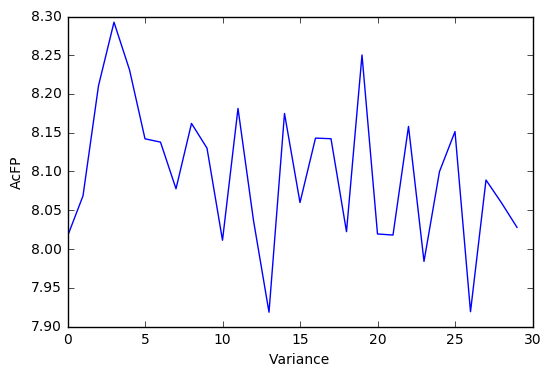

In [74]:
df1 = pd.read_csv('tizen-processed1.csv')
plt.plot(range(len(df1)), df1.macfp,)
plt.xlabel('Variance')
plt.ylabel('AcFP')
ax = plt.axes()
plt.show()

In [71]:
df1

,var,mmse,mpa,macfp,gof_errs,pa_errs,acfp_errs
0,1,85110.382058,3.501941,8.016355,7,13,7
1,11,86395.443735,3.473080,8.068580,9,25,9
2,21,89604.765751,3.459063,8.210656,14,30,14
3,31,91531.753516,3.451378,8.292651,17,32,17
4,41,90248.608801,3.460347,8.231239,15,32,15
5,51,88323.008063,3.478961,8.142184,12,24,12
6,61,88324.018062,3.490793,8.137911,12,22,12
7,71,87040.701956,3.472108,8.077725,10,34,10
8,81,88966.699436,3.492078,8.162043,13,23,13
9,91,88325.482163,3.482132,8.130122,12,29,12


In [72]:
print(df1.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  var &          mmse &       mpa &     macfp &  gof\_errs &  pa\_errs &  acfp\_errs \\
\midrule
0  &    1 &  85110.382058 &  3.501941 &  8.016355 &         7 &       13 &          7 \\
1  &   11 &  86395.443735 &  3.473080 &  8.068580 &         9 &       25 &          9 \\
2  &   21 &  89604.765751 &  3.459063 &  8.210656 &        14 &       30 &         14 \\
3  &   31 &  91531.753516 &  3.451378 &  8.292651 &        17 &       32 &         17 \\
4  &   41 &  90248.608801 &  3.460347 &  8.231239 &        15 &       32 &         15 \\
5  &   51 &  88323.008063 &  3.478961 &  8.142184 &        12 &       24 &         12 \\
6  &   61 &  88324.018062 &  3.490793 &  8.137911 &        12 &       22 &         12 \\
7  &   71 &  87040.701956 &  3.472108 &  8.077725 &        10 &       34 &         10 \\
8  &   81 &  88966.699436 &  3.492078 &  8.162043 &        13 &       23 &         13 \\
9  &   91 &  88325.482163 &  3.482132 &  8.130122 &        12 &

# DNN

In [3]:
%matplotlib inline

import numpy as np
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd

In [4]:
# Generate data points with noise
tizen = pd.read_csv("bugs-1-tizen.csv", delimiter=';')
num_points = 150
Tx = tizen.x.values

tX = tizen.y.values

In [ ]:
# Fit the first set

p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx, tX))

time = np.linspace(Tx.min(), Tx.max(), 100)
plt.plot(Tx, tX, "ro", time, fitfunc(p1, time), "r-") # Plot of the data and the fit

# Fit the second set
p0 = [-15., 0.8, 0., -1.]
p2,success = optimize.leastsq(errfunc, p0[:], args=(Ty, tY))

time = np.linspace(Ty.min(), Ty.max(), 100)
plt.plot(Ty, tY, "b^", time, fitfunc(p2, time), "b-")

# Legend the plot
plt.title("Oscillations in the compressed trap")
plt.xlabel("time [ms]")
plt.ylabel("displacement [um]")
plt.legend(('x position', 'x fit', 'y position', 'y fit'))

ax = plt.axes()

plt.text(0.8, 0.07,
         'x freq :  %.3f kHz \n y freq :  %.3f kHz' % (1/p1[1],1/p2[1]),
         fontsize=16,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes)

plt.show()